In [1]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.MPRA_predict.utils import *

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_1 = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_fold_change_new.csv')
df_1 = df_1.rename(columns={col: col.replace('SKNSH', 'SK-N-SH') for col in df_1.columns})
print(df_1.shape)
df_2 = pd.read_csv('./data/Sei_Siraj_4features.csv')
df_2 = df_2.rename(columns={col: col.replace('SKNSH', 'SK-N-SH') for col in df_2.columns})
print(df_2.shape)

# main_df = pd.concat([df_1, df_2], axis=1)
main_df = pd.merge(df_1, df_2, on='seq', how='inner', suffixes=('', '_'))
main_df = main_df.loc[:, ~main_df.columns.duplicated()]
main_df

(281327, 52)
(585605, 31)


,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,...,SK-N-SH_H3K27ac_pred_logit,SK-N-SH_CTCF_pred_logit,A549_DNase_pred_logit,A549_H3K4me3_pred_logit,A549_H3K27ac_pred_logit,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_CTCF_pred_logit
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-6.789738,-6.733233,-3.909284,-4.348619,-6.072631,-5.178783,-4.183375,-4.748006,-5.958753,-5.942789
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-6.223368,-8.315410,-3.272244,-5.964360,-7.547378,-7.003038,-4.215008,-6.929256,-7.071730,-7.614042
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.244476,-10.949686,-8.595281,-9.448072,-10.267394,-9.144752,-7.840627,-9.203153,-9.125849,-9.197061
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.412091,-11.014998,-7.453587,-9.601648,-10.099669,-9.422236,-7.347300,-9.359782,-9.115440,-9.575661
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.982100,-9.921871,-5.857311,-8.511901,-9.683179,-8.141296,-6.796749,-8.733803,-9.130206,-8.654516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281358,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-9.020057,-8.466288,-6.562126,-8.720474,-9.072392,-6.511399,-6.431361,-8.173793,-8.043088,-7.009111
281359,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,-8.301242,-1.055471,-1.251306,-5.968614,-7.031375,0.056848,-0.772791,-5.641770,-6.482600,-0.263586
281360,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-7.919404,-7.090119,-3.390067,-5.186029,-5.979089,-5.489334,-4.034711,-6.015636,-6.730436,-6.365997
281361,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-5.441120,-6.417299,-2.529838,-5.499373,-6.408796,-6.070607,-2.356441,-5.232915,-5.920075,-6.512767


In [3]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for cell_type in cell_types:
    for assay in assays:
        main_df[f'{cell_type}_{assay}_observed_log'] = np.log10(main_df[f'{cell_type}_{assay}_fold_change']+1e-2)
        # data = main_df[f'{cell_type}_{assay}_fold_change']
        # estimated_mean = np.mean(np.log10(data[data>0]))
        # data[data==0] = estimated_mean
        # main_df[f'{cell_type}_{assay}_observed_log'] = np.log10(data)

        # data = main_df[f'{cell_type}_{assay}_fold_change']
        # # Compute the log only once where data is greater than 0
        # log_data = np.log10(data[data > 0])
        # estimated_mean = np.mean(log_data)
        # # Apply estimated mean directly to where data is zero
        # main_df[f'{cell_type}_{assay}_observed_log'] = np.where(data > 0, log_data, estimated_mean)

main_df

,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,...,SK-N-SH_H3K27ac_observed_log,SK-N-SH_CTCF_observed_log,A549_DNase_observed_log,A549_H3K4me3_observed_log,A549_H3K27ac_observed_log,A549_CTCF_observed_log,HCT116_DNase_observed_log,HCT116_H3K4me3_observed_log,HCT116_H3K27ac_observed_log,HCT116_CTCF_observed_log
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-2.000000,-0.502893,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-2.000000,-2.000000,-1.403144,-0.626807,-0.917920,-0.329992,-1.311137,-0.685264,-0.811553,-2.000000
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-0.700210,-0.485486,-2.000000,-0.308634,-0.850350,-0.097458,-2.000000,-0.973129,-2.000000,-0.267933
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-2.000000,-0.609261,-1.897946,-0.865243,-2.000000,-0.328006,-1.609618,-1.301346,-2.000000,-2.000000
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281358,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-0.614851,-0.474890,-1.371512,-0.657919,-0.300799,0.138531,-2.000000,-0.393813,-2.000000,-0.916799
281359,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,-0.758791,-0.216494,-1.186916,-0.566743,-0.631654,0.112018,-1.563510,-0.320681,-0.035090,-0.114996
281360,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-2.000000,0.116240,-1.355571,-0.393998,-0.181186,-0.029125,-2.000000,-0.610692,-0.917808,-0.916799
281361,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-1.480677,-0.790257,-1.221205,-0.580446,-0.431202,-0.616989,-1.143657,-0.656750,-0.484063,-0.980243


In [4]:
# print(df_1['seq'].duplicated().sum())  # df_1中重复值的数量
# print(df_2['seq'].duplicated().sum())  # df_2中重复值的数量

In [5]:
# main_df = pd.read_csv('data/Sei_Siraj_4features.csv')
# main_df.rename(columns={c: c.replace('SKNSH', 'SK-N-SH') for c in main_df.columns}, inplace=True)
# main_df

In [6]:
main_df.columns

Index(['seq', 'A549', 'HepG2', 'K562', 'SK-N-SH', 'HCT116', 'is_ref', 'chr',
       'pos', 'ref',
       ...
       'SK-N-SH_H3K27ac_observed_log', 'SK-N-SH_CTCF_observed_log',
       'A549_DNase_observed_log', 'A549_H3K4me3_observed_log',
       'A549_H3K27ac_observed_log', 'A549_CTCF_observed_log',
       'HCT116_DNase_observed_log', 'HCT116_H3K4me3_observed_log',
       'HCT116_H3K27ac_observed_log', 'HCT116_CTCF_observed_log'],
      dtype='object', length=102)

In [7]:
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

r_array = np.zeros(shape=(len(cell_types), len(assays)))
r_array = pd.DataFrame(r_array, index=cell_types, columns=assays)

for cell_type in cell_types:
    for assay in assays:
        x = main_df[f'{cell_type}_{assay}_pred_logit']
        y = main_df[cell_type]
        r = pearson(x, y)
        r_array.loc[cell_type, assay] = r

print(r_array)
# r_array.to_csv('data/pearson_r_matrix.csv', float_format='%.3f')

            DNase   H3K4me3   H3K27ac      CTCF
HepG2    0.445264  0.466694  0.427410  0.341954
K562     0.499320  0.450598  0.443150  0.356856
SK-N-SH  0.375337  0.485866  0.469157  0.319530
A549     0.345069  0.361541  0.362107  0.232838
HCT116   0.424080  0.445738  0.451635  0.329967


In [8]:
# assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
# cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

# r_array = np.zeros(shape=(len(cell_types), len(assays)))
# r_array = pd.DataFrame(r_array, index=cell_types, columns=assays)

# for cell_type in cell_types:
#     for assay in assays:
#         x = main_df[f'{cell_type}_{assay}_fold_change']
#         y = main_df[cell_type]
#         r = pearson(x, y)
#         # r = pearson(x, y)
#         r_array.loc[cell_type, assay] = r

# print(r_array)
# # r_array.to_csv('data/pearson_r_matrix.csv', float_format='%.3f')

In [9]:
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

r_array = np.zeros(shape=(len(cell_types), len(assays)))
r_array = pd.DataFrame(r_array, index=cell_types, columns=assays)

for cell_type in cell_types:
    for assay in assays:
        x = main_df[f'{cell_type}_{assay}_observed_log']
        y = main_df[cell_type]
        r = pearson(x, y)
        r_array.loc[cell_type, assay] = r

print(r_array)
# r_array.to_csv('data/pearson_r_matrix.csv', float_format='%.3f')

            DNase   H3K4me3   H3K27ac      CTCF
HepG2    0.315817  0.078436  0.108513  0.052294
K562     0.368405  0.140583  0.124220  0.106422
SK-N-SH  0.288441  0.096691  0.090007  0.067519
A549     0.264613  0.099385  0.086312  0.031949
HCT116   0.293898  0.160410  0.126588  0.071247


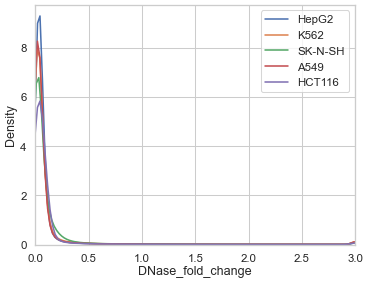

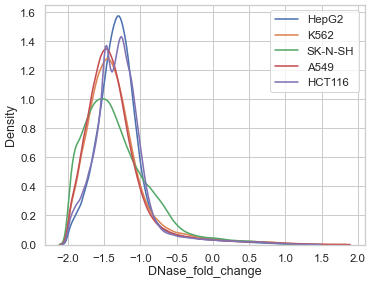

In [33]:
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']
assays = ['DNase']
threshold = 3

for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_fold_change'].copy()
        x[x > threshold] = threshold
        sns.kdeplot(x, label=cell_type)
    plt.xlim(0, threshold)
    plt.xlabel(f'{assay}_fold_change')
    plt.legend()
    plt.savefig(f'figures/fold_change_kde/{assay}.png', dpi=200)
    plt.show()



for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_observed_log'].copy()
        # x[x > threshold] = threshold
        sns.kdeplot(x, label=cell_type)
    plt.xlabel(f'{assay}_fold_change')
    plt.legend()
    plt.savefig(f'figures/fold_change_kde/{assay}.png', dpi=200)
    plt.show()

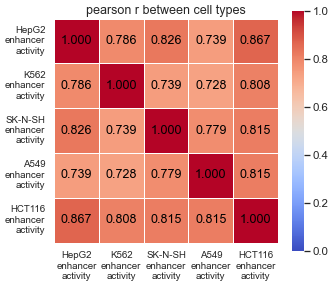

In [ ]:
# corr_matrix = Siraj_df[cell_types].corr(method='pearson')
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# np.fill_diagonal(mask, False)

corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(len(cell_types)):
        x = main_df[f'{cell_types[i]}']
        y = main_df[f'{cell_types[j]}']
        corr_matrix[i][j] = pearson(x, y)
        # corr_matrix[i][j] = spearman(x, y)

plt.figure(figsize=(7, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.heatmap(corr_matrix, square=True, linewidths=1,
            cmap='Reds', vmin=0.2, vmax=0.8, 
            annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
           rotation=0, fontsize=14)
plt.yticks(ticks=np.arange(len(cell_types))+0.5, 
           labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
           rotation=0, fontsize=14)

plt.title('pearson r between cell types')
plt.savefig('figures/heatmap_pearson_r_enhancer_activity_vs_enhancer_activity.png', dpi=400)
plt.show()

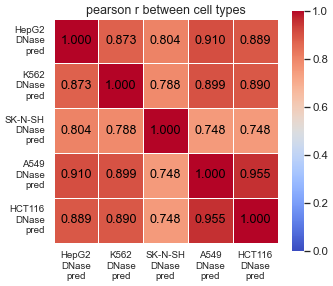

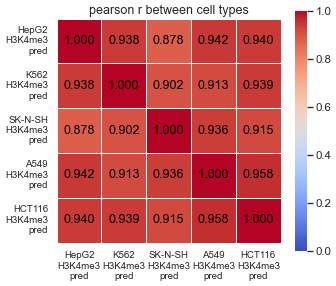

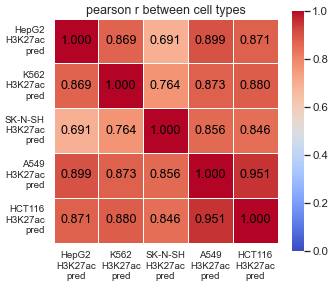

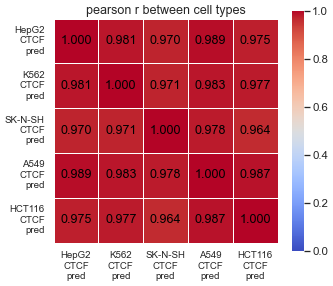

In [ ]:
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit']
            y = main_df[f'{cell_types[j]}_{assay}_pred_logit']
            corr_matrix[i][j] = pearson(x, y)
            # corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='Reds', vmin=0.2, vmax=0.8, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_vs_{assay}_pred.png', dpi=200)
    plt.show()

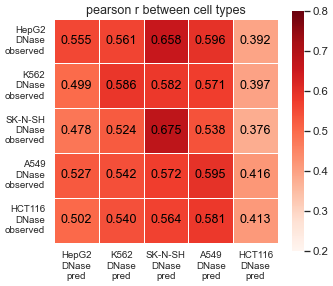

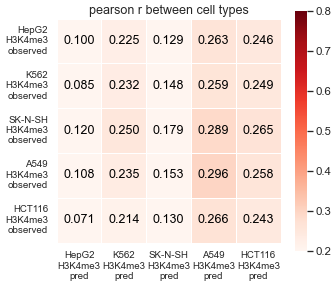

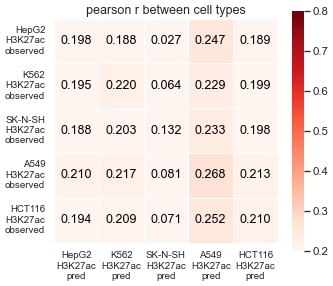

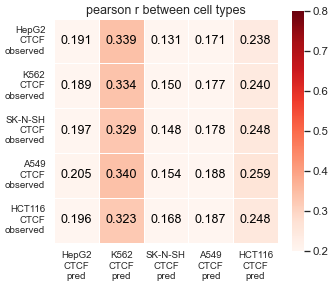

In [22]:
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit']
            y = main_df[f'{cell_types[j]}_{assay}_observed_log']
            corr_matrix[i][j] = pearson(x, y)
            # corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='Reds', vmin=0.2, vmax=0.8, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\nobserved' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_vs_{assay}_observed.png', dpi=200)
    plt.show()

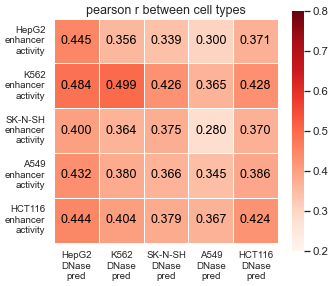

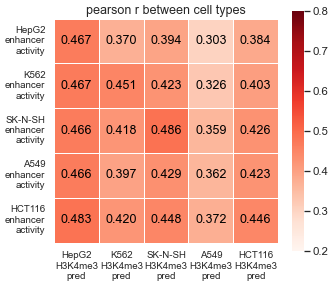

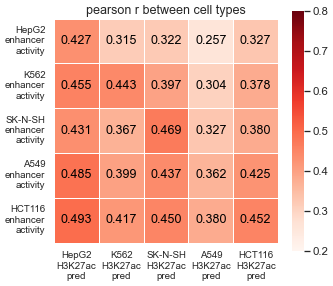

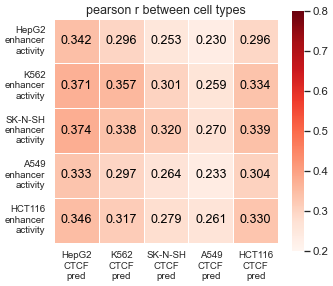

In [23]:
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_pred_logit']
            y = main_df[f'{cell_types[j]}']
            corr_matrix[i][j] = pearson(x, y)
            # corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='Reds', vmin=0.2, vmax=0.8, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\npred' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_pred_vs_enhancer_activity.png', dpi=200)
    plt.show()

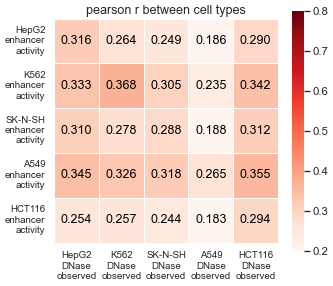

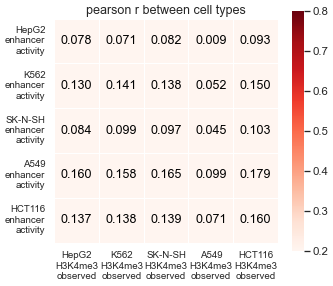

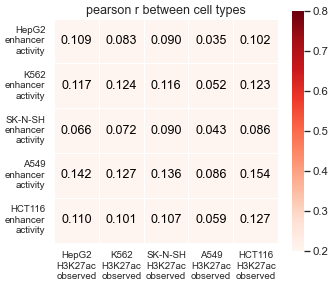

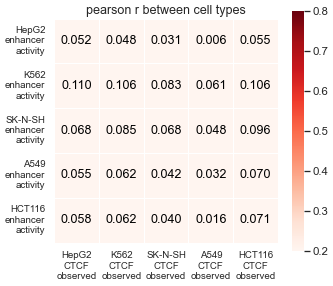

In [24]:
assays = ['DNase', 'H3K4me3','H3K27ac', 'CTCF']
cell_types = ['HepG2', 'K562', 'SK-N-SH', 'A549', 'HCT116']

for assay in assays:
    corr_matrix = np.zeros(shape=(len(cell_types), len(cell_types)))
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            x = main_df[f'{cell_types[i]}_{assay}_observed_log']
            y = main_df[f'{cell_types[j]}']
            corr_matrix[i][j] = pearson(x, y)
            # corr_matrix[i][j] = pearson(x, y)

    plt.figure(figsize=(7, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    sns.heatmap(corr_matrix, square=True, linewidths=1, 
                cmap='Reds', vmin=0.2, vmax=0.8, 
                annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
    plt.xticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\n{assay}\nobserved' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.yticks(
        ticks=np.arange(len(cell_types))+0.5, 
        labels=[f'{cell_type}\nenhancer\nactivity' for cell_type in cell_types], 
        rotation=0, fontsize=14)
    plt.title(f'pearson r between cell types')
    plt.savefig(f'figures/heatmap_pearson_r_{assay}_observed_vs_enhancer_activity.png', dpi=200)
    plt.show()